# KNN

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Check out the Data

In [6]:
df = pd.read_csv('Classified Data.txt',index_col=0)

In [8]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [10]:
df['WTT'].max()

1.721779168965468

In [12]:
df['WTT'].min()

0.174411668391638

In [14]:
df['NXJ'].max()

1.8939496030653464

In [16]:
df['NXJ'].min()

0.639692747423801

# Standardize the Variables

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [23]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [25]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [27]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


In [29]:
df_feat['WTT'].max()

2.667092453480776

In [31]:
df_feat['WTT'].min()

-2.678050294892763

In [33]:
df_feat['NXJ'].max()

2.6024764661358253

In [35]:
df_feat['NXJ'].min()

-3.542140064466624

# Train Test Split

In [38]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, df['TARGET CLASS'], test_size=0.33, random_state=42)

# Using KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn = KNeighborsClassifier(n_neighbors=1)

In [47]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [49]:
pred = knn.predict(X_test)

# Evaluation

In [52]:
print(knn.score(X_test,y_test))

0.9393939393939394


In [54]:
from sklearn.metrics import confusion_matrix

In [56]:
print(confusion_matrix(y_test,pred))

[[146   9]
 [ 11 164]]


In [58]:
from sklearn.metrics import classification_report

In [60]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       155
           1       0.95      0.94      0.94       175

    accuracy                           0.94       330
   macro avg       0.94      0.94      0.94       330
weighted avg       0.94      0.94      0.94       330



# Choosing a K Value

In [68]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [71]:
error_rate

[0.06060606060606061,
 0.08181818181818182,
 0.05454545454545454,
 0.05757575757575758,
 0.048484848484848485,
 0.05454545454545454,
 0.05757575757575758,
 0.051515151515151514,
 0.048484848484848485,
 0.048484848484848485,
 0.051515151515151514,
 0.045454545454545456,
 0.048484848484848485,
 0.048484848484848485,
 0.051515151515151514,
 0.051515151515151514,
 0.05454545454545454,
 0.048484848484848485,
 0.05454545454545454,
 0.051515151515151514,
 0.05454545454545454,
 0.05757575757575758,
 0.06060606060606061,
 0.05454545454545454,
 0.05757575757575758,
 0.05454545454545454,
 0.051515151515151514,
 0.051515151515151514,
 0.048484848484848485,
 0.045454545454545456,
 0.048484848484848485,
 0.045454545454545456,
 0.048484848484848485,
 0.048484848484848485,
 0.048484848484848485,
 0.048484848484848485,
 0.048484848484848485,
 0.051515151515151514,
 0.051515151515151514]

Text(0, 0.5, 'Error Rate')

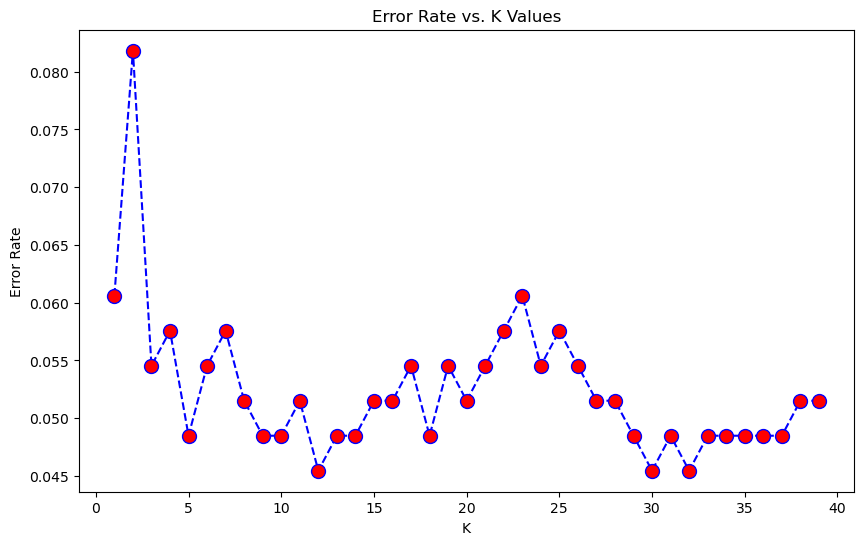

In [73]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',ls='--',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. K Values')
plt.xlabel('K')
plt.ylabel('Error Rate')

### K=1

In [76]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(knn.score(X_test,y_test))

0.9393939393939394


### K=5

In [79]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(knn.score(X_test,y_test))

0.9515151515151515


### K=30

In [82]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(knn.score(X_test,y_test))

0.9545454545454546


### K=12

In [85]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(knn.score(X_test,y_test))

0.9545454545454546
